YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Apr, 2025
Time:                     19:53:32
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    28.9304
Nobs:                     1801.00    HQIC:                   28.4394
Log likelihood:          -37873.6    FPE:                1.68412e+12
AIC:                      28.1522    Det(Omega_mle):     1.46466e+12
--------------------------------------------------------------------
Results for equation Open_GOOGL
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.096478         0.111705           -0.864           0.388
L1.Open_GOOGL           -0.157778         0.048166           -3.276           0.001
L1.High_GOOGL            0.045378         0

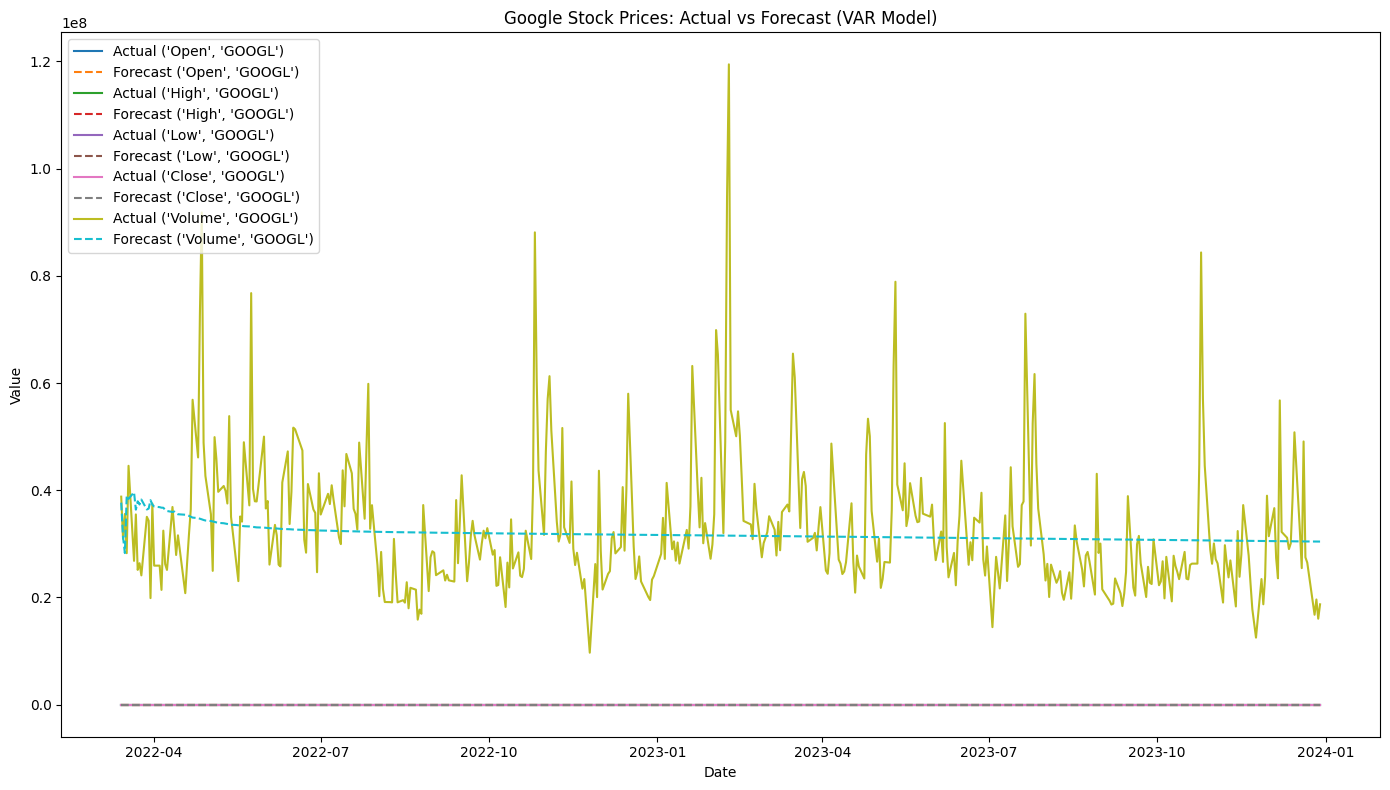


🔍 RMSE for each feature:
('Open', 'GOOGL'): 35.0149
('High', 'GOOGL'): 35.0342
('Low', 'GOOGL'): 34.6128
('Close', 'GOOGL'): 34.7943
('Volume', 'GOOGL'): 12700003.4947


In [1]:

!pip install yfinance statsmodels --quiet


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse


df = yf.download('GOOGL', start='2015-01-01', end='2024-01-01')[['Open', 'High', 'Low', 'Close', 'Volume']]
df = df.dropna()


train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


model = VAR(train)
results = model.fit(maxlags=15, ic='aic')
print(results.summary())


lag_order = results.k_ar
forecast_input = train.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=len(test))


forecast_df = pd.DataFrame(forecast, index=test.index, columns=df.columns)


plt.figure(figsize=(14, 8))
for col in df.columns:
    plt.plot(test[col], label=f'Actual {col}')
    plt.plot(forecast_df[col], '--', label=f'Forecast {col}')
plt.title("Google Stock Prices: Actual vs Forecast (VAR Model)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


print("\n RMSE for each feature:")
for col in df.columns:
    error = rmse(test[col], forecast_df[col])
    print(f'{col}: {error:.4f}')
